In [ ]:
#This notebook takes parsed .json outputs of individual PISA runs and concurrently plots relevant metrics
#Code cells can be modified to plot various data attributes

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json

In [2]:
base_dir = ''
d_count = 297
d_frames = 1
t_interval = 1
framerate = 1 #hz
samples = {'Blank':'t0','0.0001 mg/mL':'t1','0.001 mg/mL':'t2','0.01 mg/mL':'t3','0.1 mg/mL':'t4','1.0 mg/mL':'t5'}

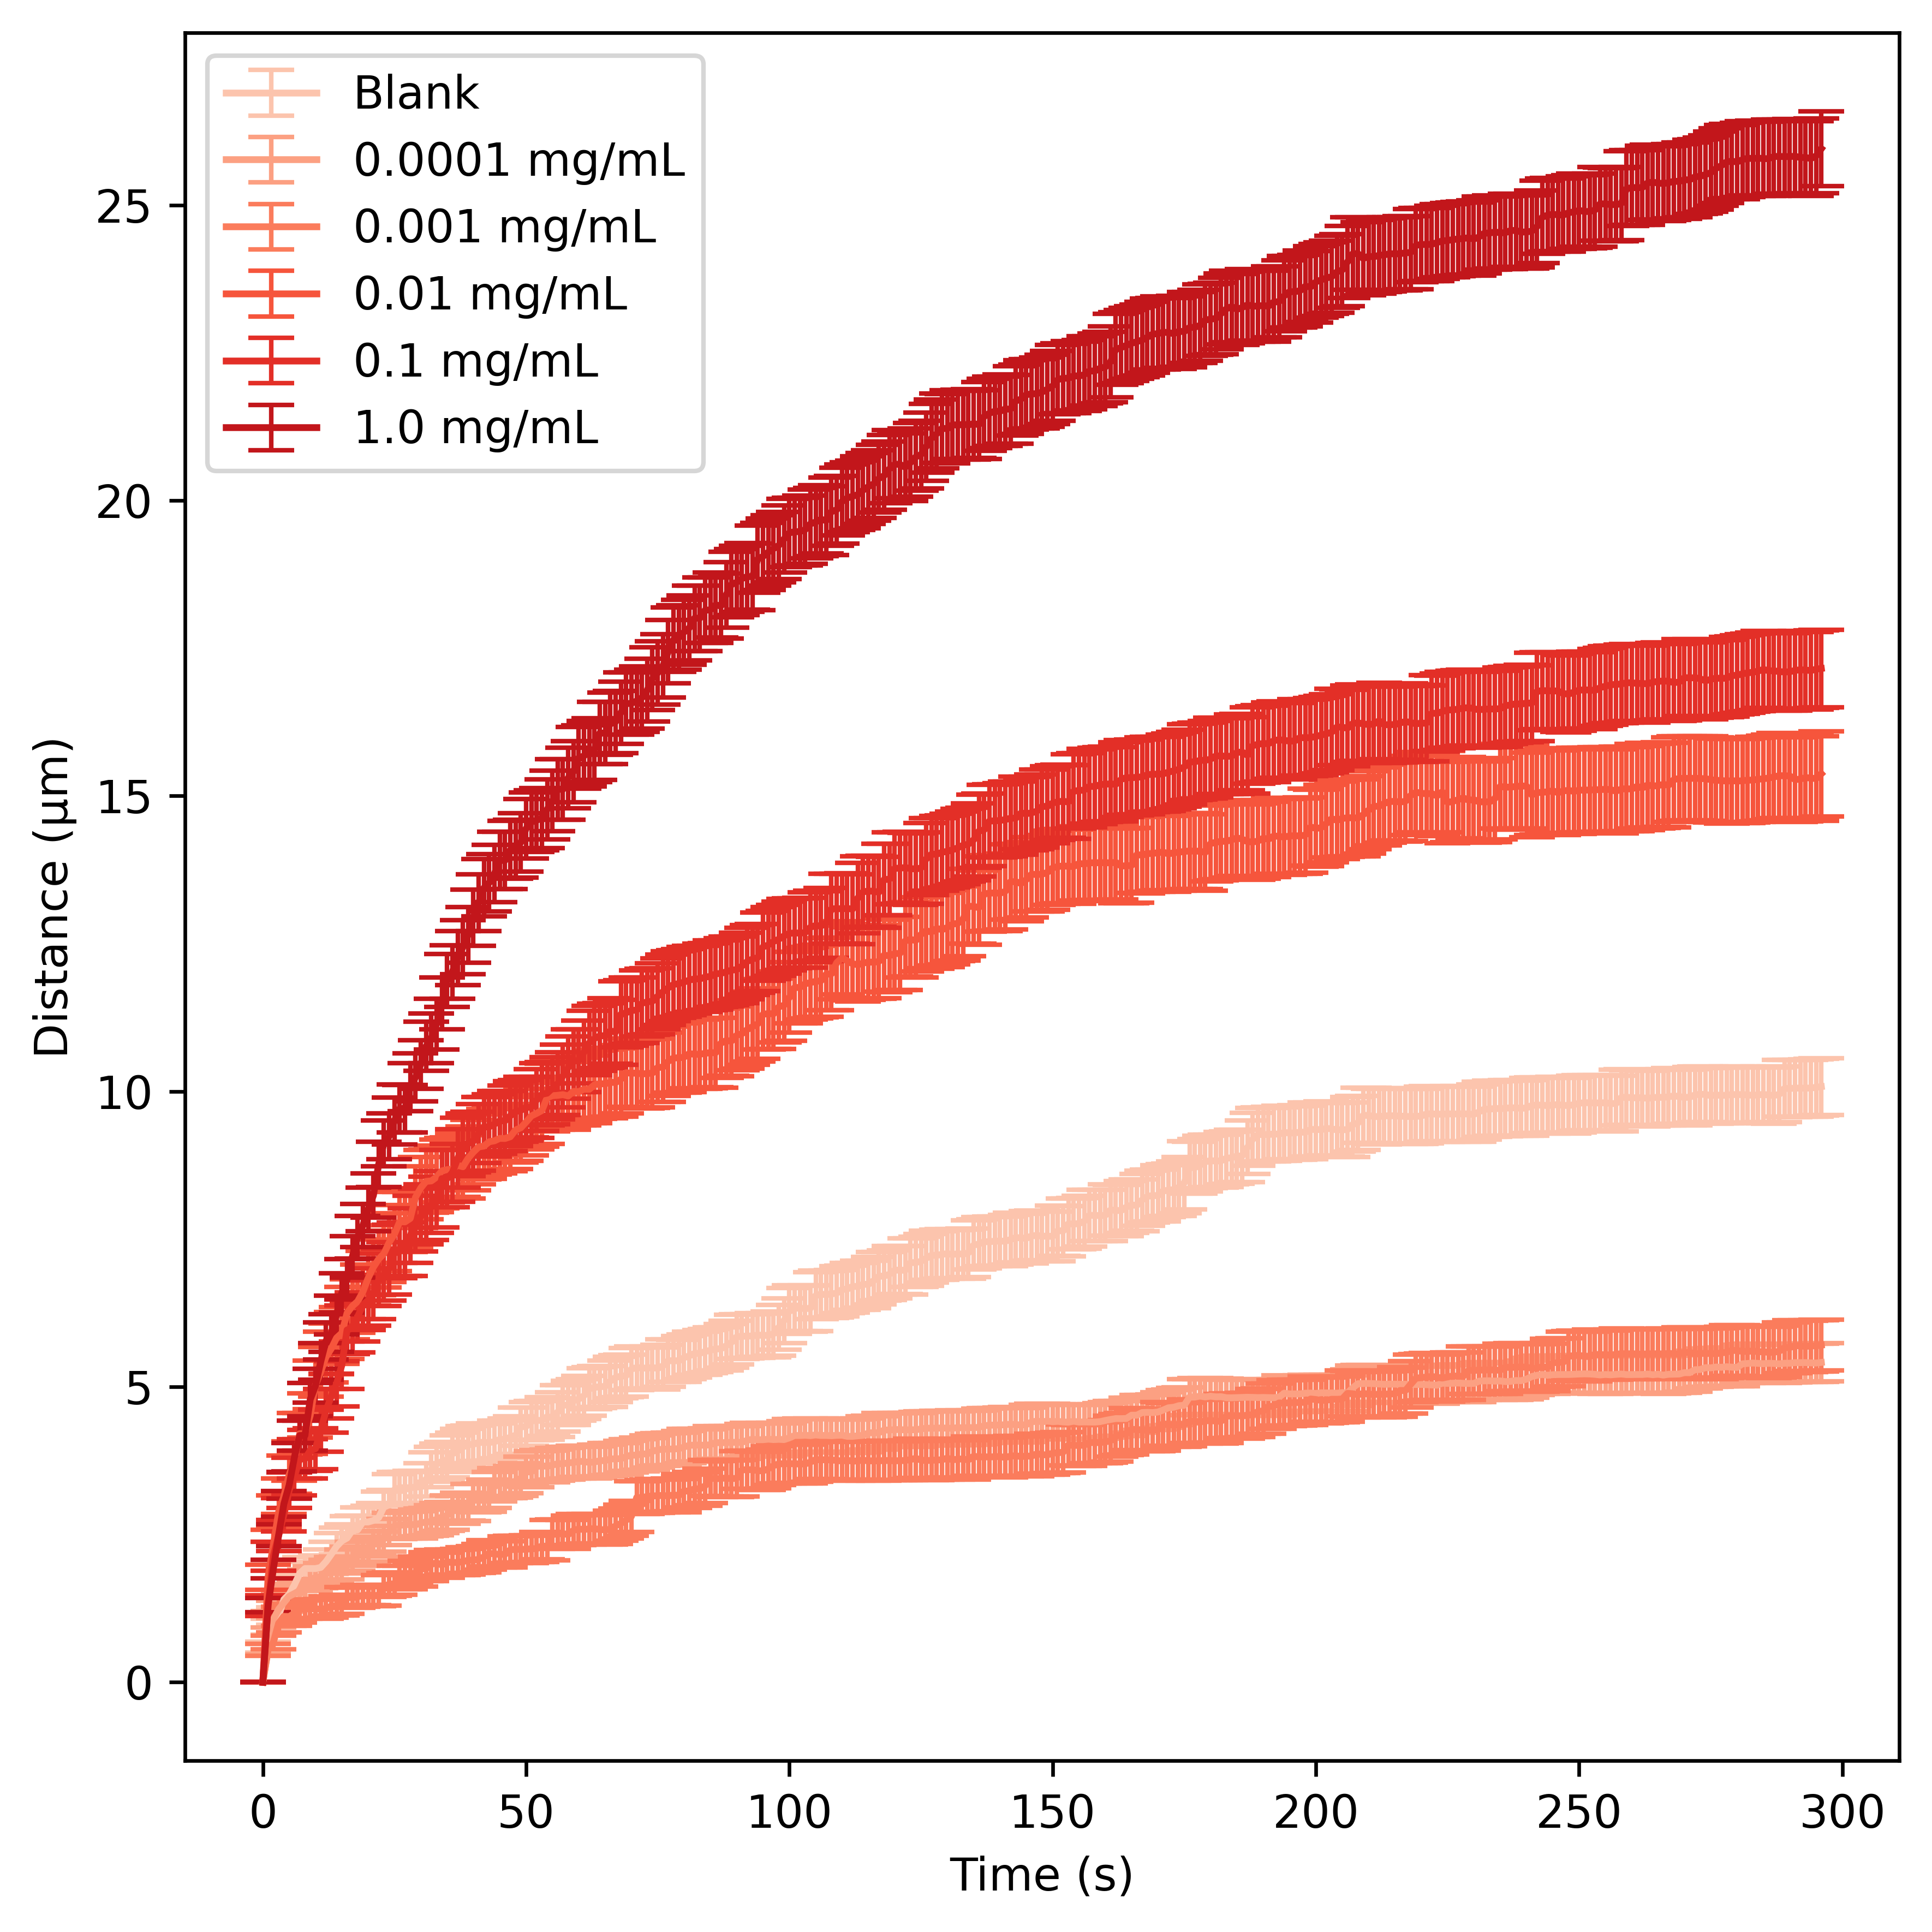

In [3]:
#plot mean of mean bead travel
matplotlib.rcParams['pdf.fonttype']=42
fig = plt.figure(figsize=(6,6),dpi=600)

times = np.arange(0,d_count,t_interval)
c_count = 0

for sample in samples:
    with open(base_dir + samples[sample] + '.json', 'r') as f:
        beads = json.load(f)

    means = [[] for _ in range(d_count)]
    bead_count = 0
    static_threshold = 0.0

    for compartment in beads:
        for bead in beads[compartment]:
            bead_means = []
            distances = beads[compartment][bead]['distance_from_start']
            if len(distances) > 50:
                for i in range(d_count):
                    if len(distances) < (i+1)*d_frames:
                        mean = bead_means[-1]
                    else:
                        mean = np.mean(distances[i*d_frames:i*d_frames+d_frames])

                    bead_means.append(mean)
                    means[i].append(mean)

            bead_count += 1

    full_means = []
    full_errors = []

    for i in range(d_count):
        collected = means[i]
        full_means.append(np.mean(collected))
        full_errors.append(np.std(collected)/np.sqrt(bead_count))

    plt.errorbar(times, full_means, color=plt.cm.Reds((c_count+2)/9), label=sample, yerr=full_errors, capsize=5, elinewidth=1)
    c_count += 1

# plt.ylim(0.05, .15)
plt.xlabel('Time (s)')
plt.ylabel('Distance (μm)')
plt.legend(loc='upper left')
plt.tight_layout()
fig.savefig(base_dir + 'distance_sem_mean_all.jpg', format='jpg')

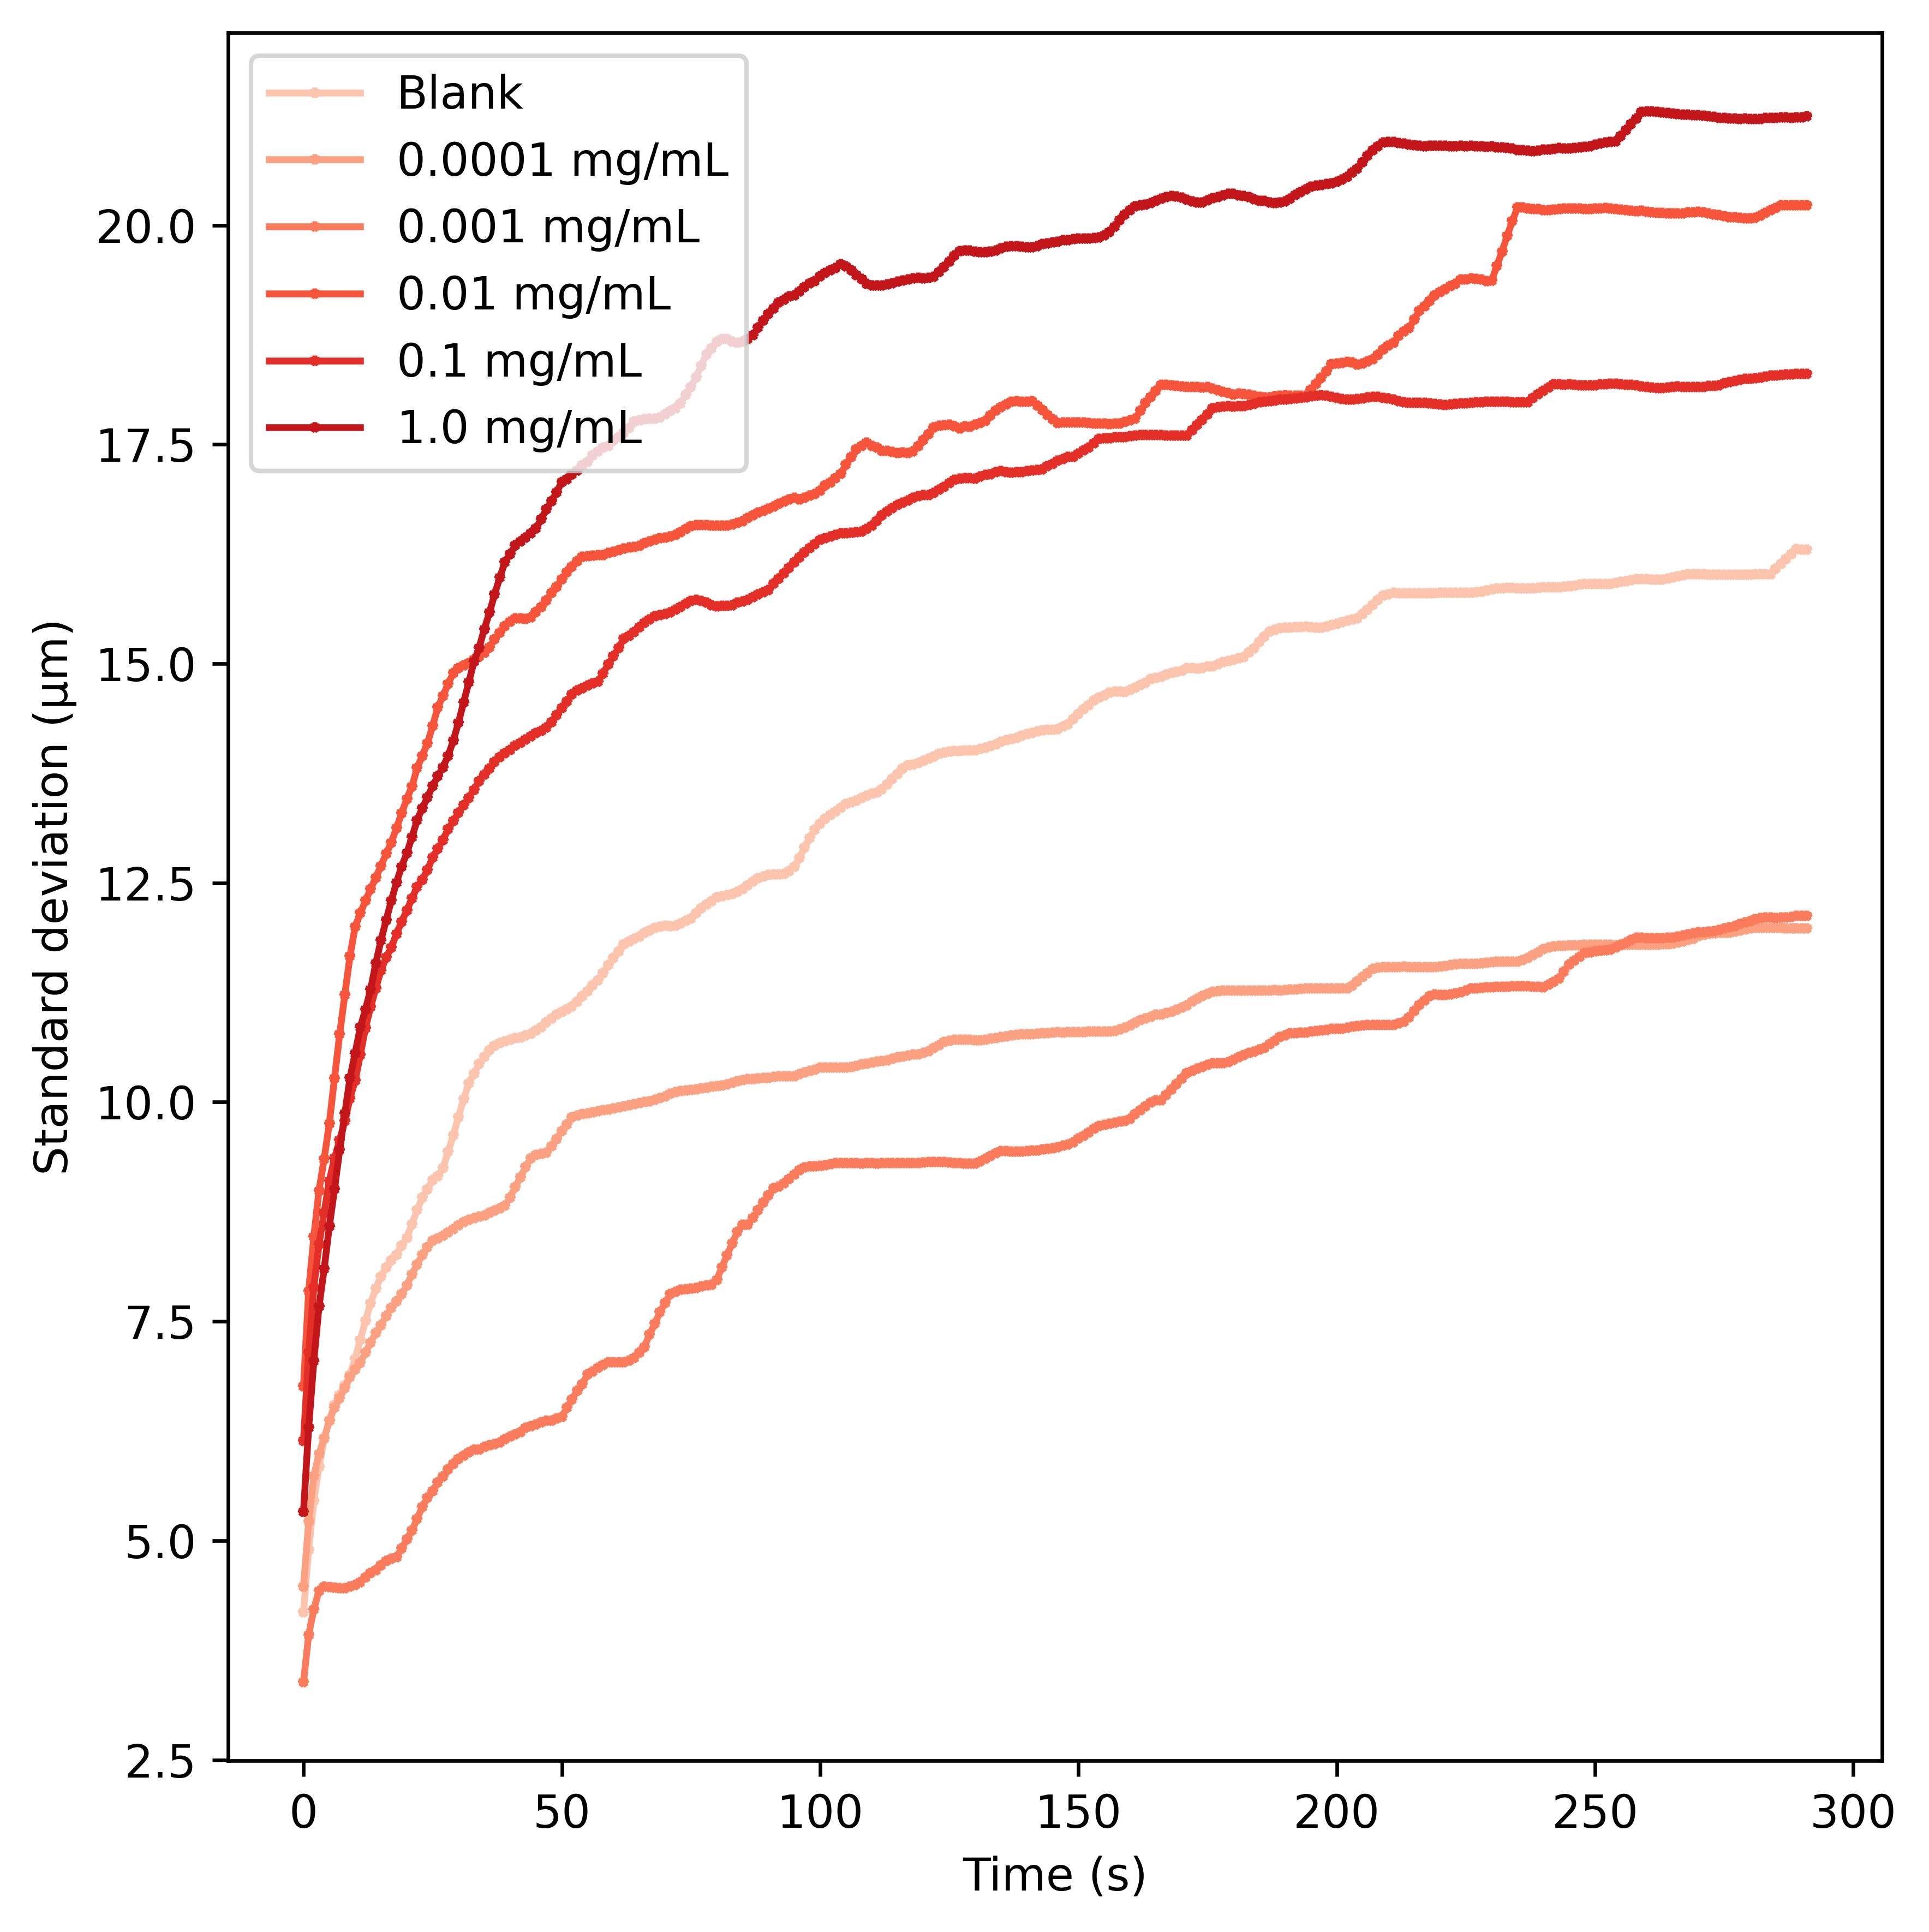

In [4]:
#plot rolling mean of mean bead travel
matplotlib.rcParams['pdf.fonttype']=42
fig = plt.figure(figsize=(6,6),dpi=600)

cropped_times = np.arange(0,d_count,t_interval*5)
c_count = 0

for sample in samples:
    with open(base_dir + samples[sample] + '.json', 'r') as f:
        beads = json.load(f)

    means = [[] for _ in range(d_count)]
    bead_count = 0
    static_threshold = 0.0

    for compartment in beads:
        for bead in beads[compartment]:
            bead_means = []
            distances = beads[compartment][bead]['distance_from_start']
            if len(distances) > 50:
                for i in range(d_count):
                    if len(distances) < (i+1)*d_frames:
                        mean = bead_means[-1]
                    else:
                        mean = np.mean(distances[i*d_frames:i*d_frames+d_frames])

                    bead_means.append(mean)
                    means[i].append(mean)

                bead_count += 1

    full_means = []
    full_errors = []

    for i in range(d_count):
        collected = np.concatenate(means[i:i+5])
        full_means.append(np.mean(collected))
        # full_errors.append(np.std(collected)/np.sqrt(len(collected)))
        full_errors.append(np.std(collected))

    plt.plot(times[:-5], full_errors[:-5], color=plt.cm.Reds((c_count+2)/9), label=sample, marker='*', markersize=2)
    c_count += 1

# plt.ylim(0.05, .15)
plt.xlabel('Time (s)')
plt.ylabel('Standard deviation (μm)')
plt.legend(loc='upper left')
plt.tight_layout()
fig.savefig(base_dir + 'sd_distance_sem_all.jpg', format='jpg')

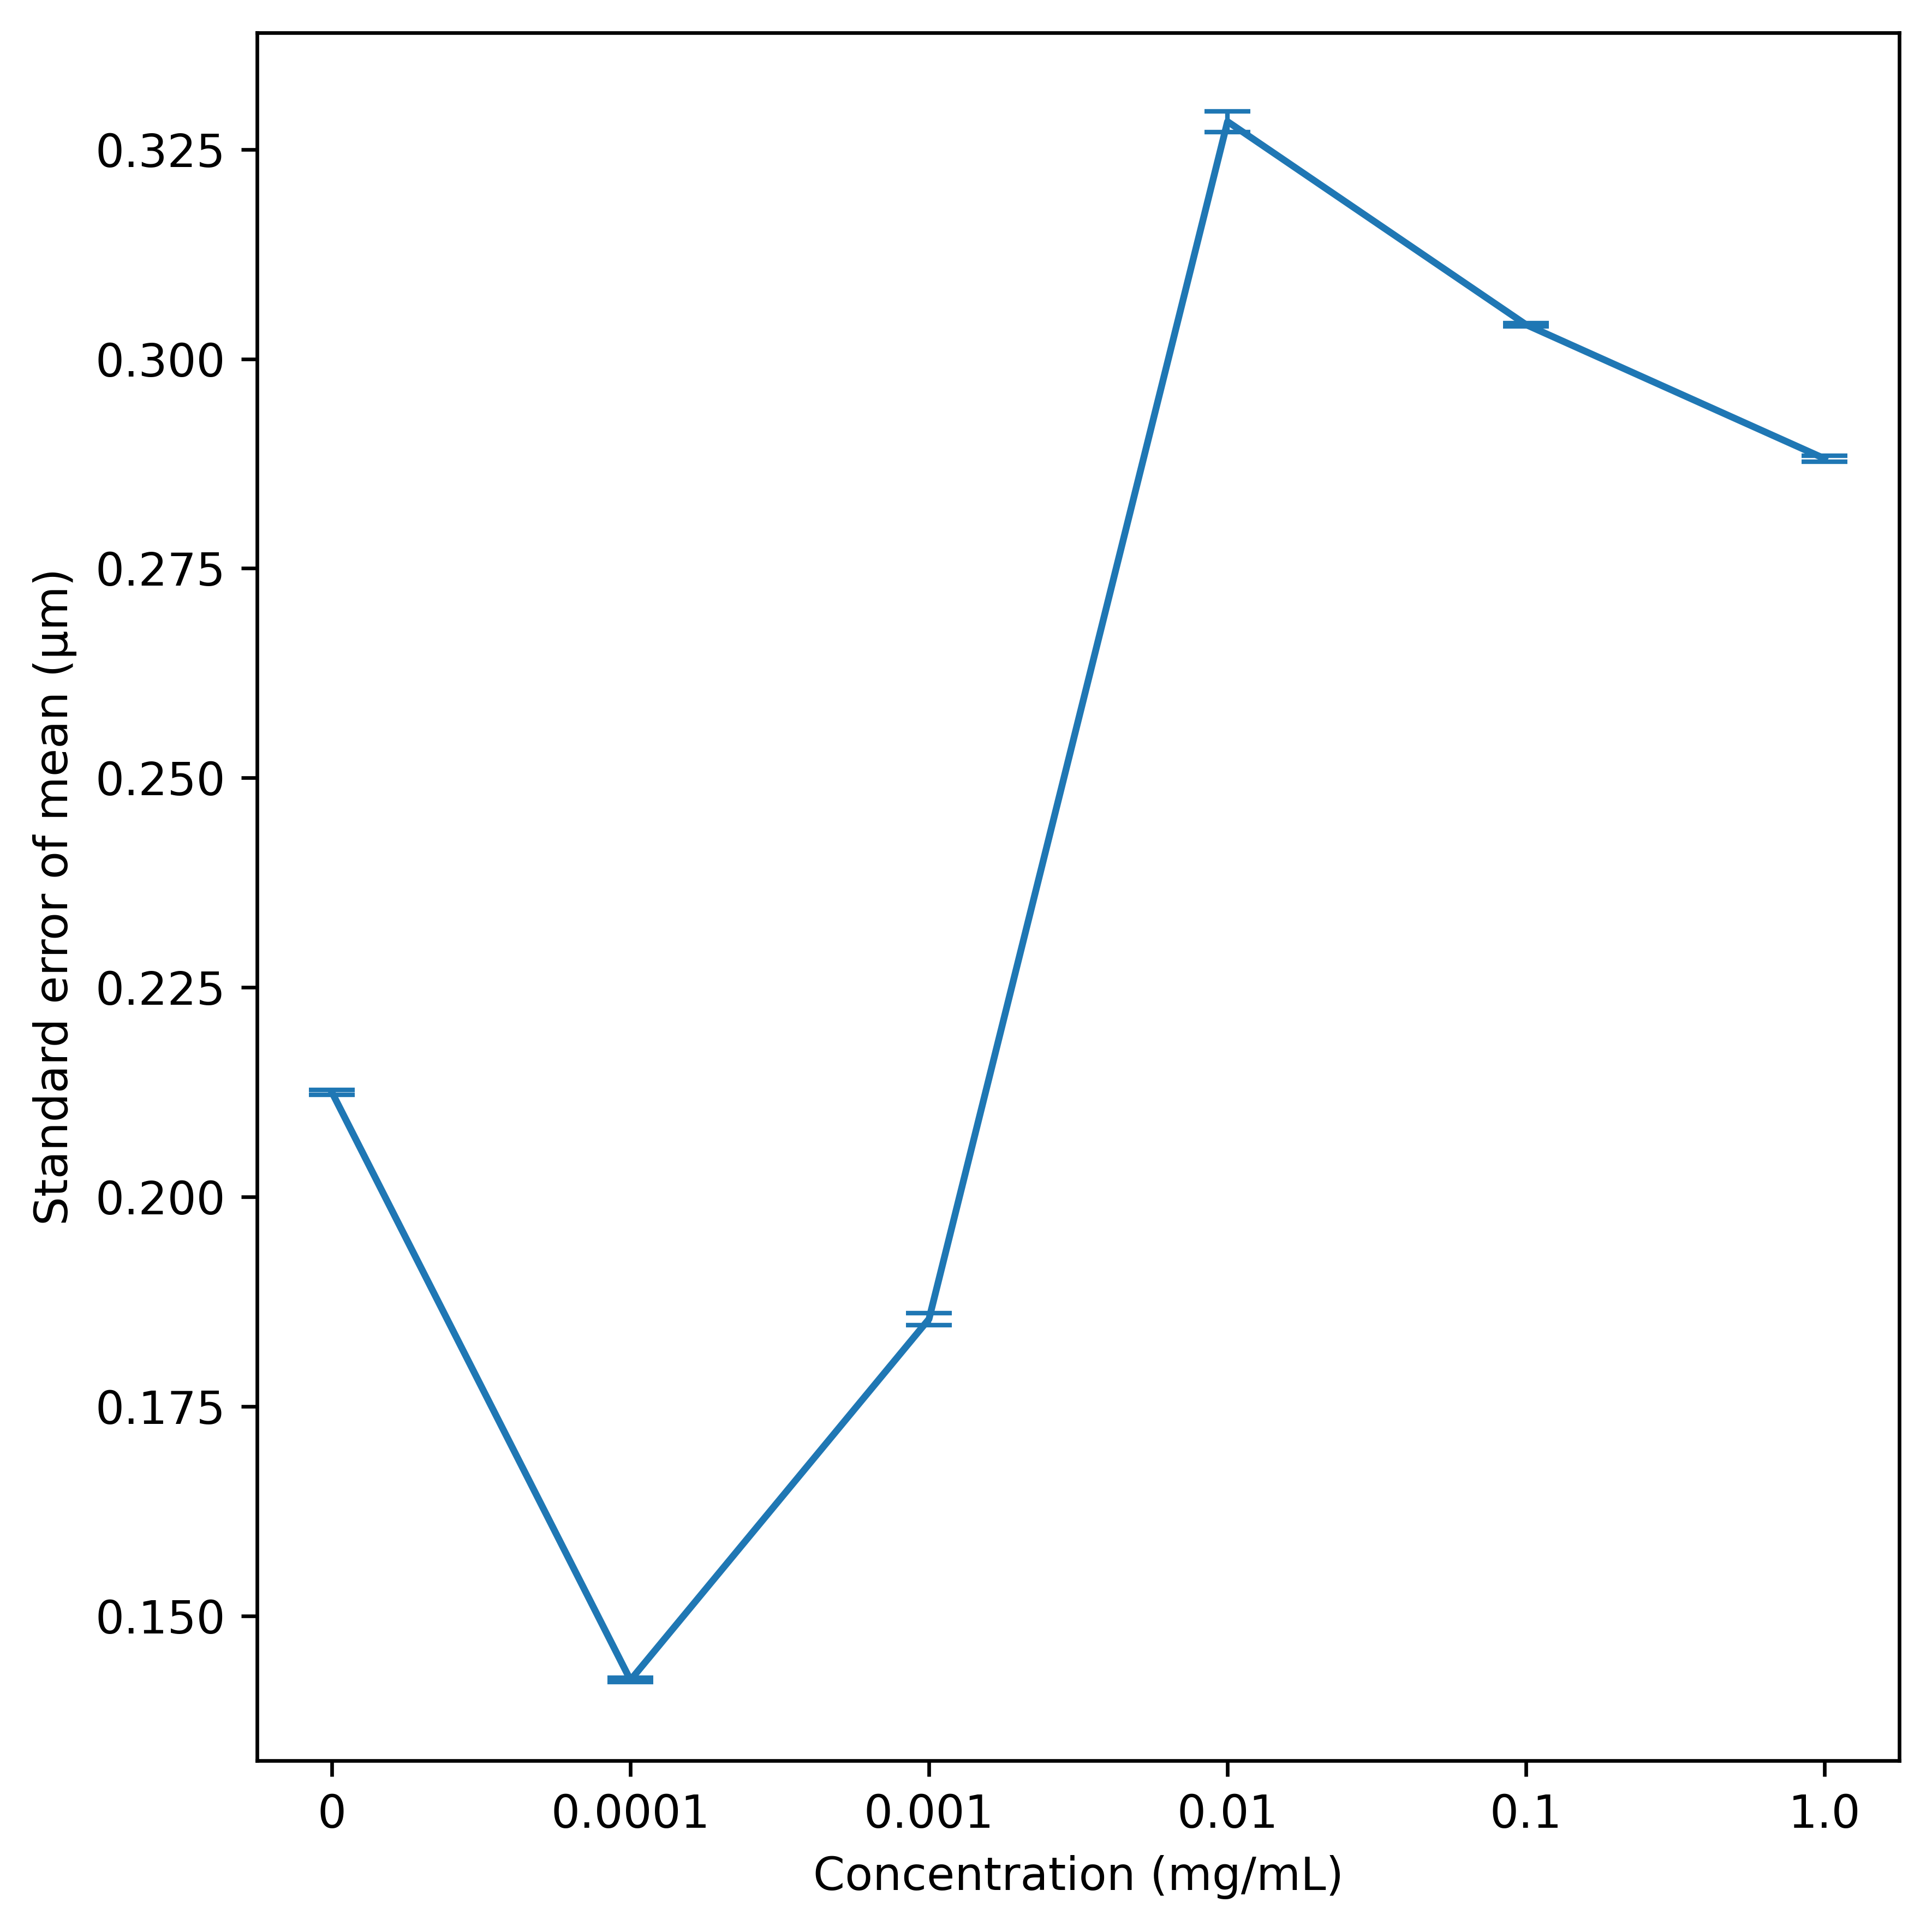

In [9]:
#plot concentration endpoints
matplotlib.rcParams['pdf.fonttype']=42
fig = plt.figure(figsize=(6,6),dpi=600)

output_metrics = []
output_errors = []

for sample in samples:
    with open(base_dir + samples[sample] + '.json', 'r') as f:
        beads = json.load(f)

    means = [[] for _ in range(d_count)]
    bead_count = 0
    static_threshold = 0.0

    for compartment in beads:
        for bead in beads[compartment]:
            bead_means = []
            distances = beads[compartment][bead]['distance_from_start']
            if len(distances) > 50:
                for i in range(d_count):
                    if len(distances) < (i+1)*d_frames:
                        mean = bead_means[-1]
                    else:
                        mean = np.mean(distances[i*d_frames:i*d_frames+d_frames])

                    bead_means.append(mean)
                    means[i].append(mean)

                bead_count += 1

    full_means = []
    full_errors = []

    for i in range(d_count):
        collected = np.concatenate(means[i:i+5])
        full_means.append(np.mean(collected))
        full_errors.append(np.std(collected)/np.sqrt(len(collected)))

    output_metric = np.mean(full_errors[-105:-5])
    output_error = np.std(full_errors[-105:-5]/np.sqrt(100))

    output_metrics.append(output_metric)
    output_errors.append(output_error)

concs = ['0','0.0001','0.001','0.01','0.1','1.0']

plt.errorbar(concs, output_metrics[:], yerr=output_errors[:], capsize=5, elinewidth=1)

plt.xlabel('Concentration (mg/mL)')
plt.ylabel('Standard error of mean (μm)')
# plt.ylabel('Distance (μm)')
plt.tight_layout()
fig.savefig(base_dir + 'sem_concs.jpg', format='jpg')

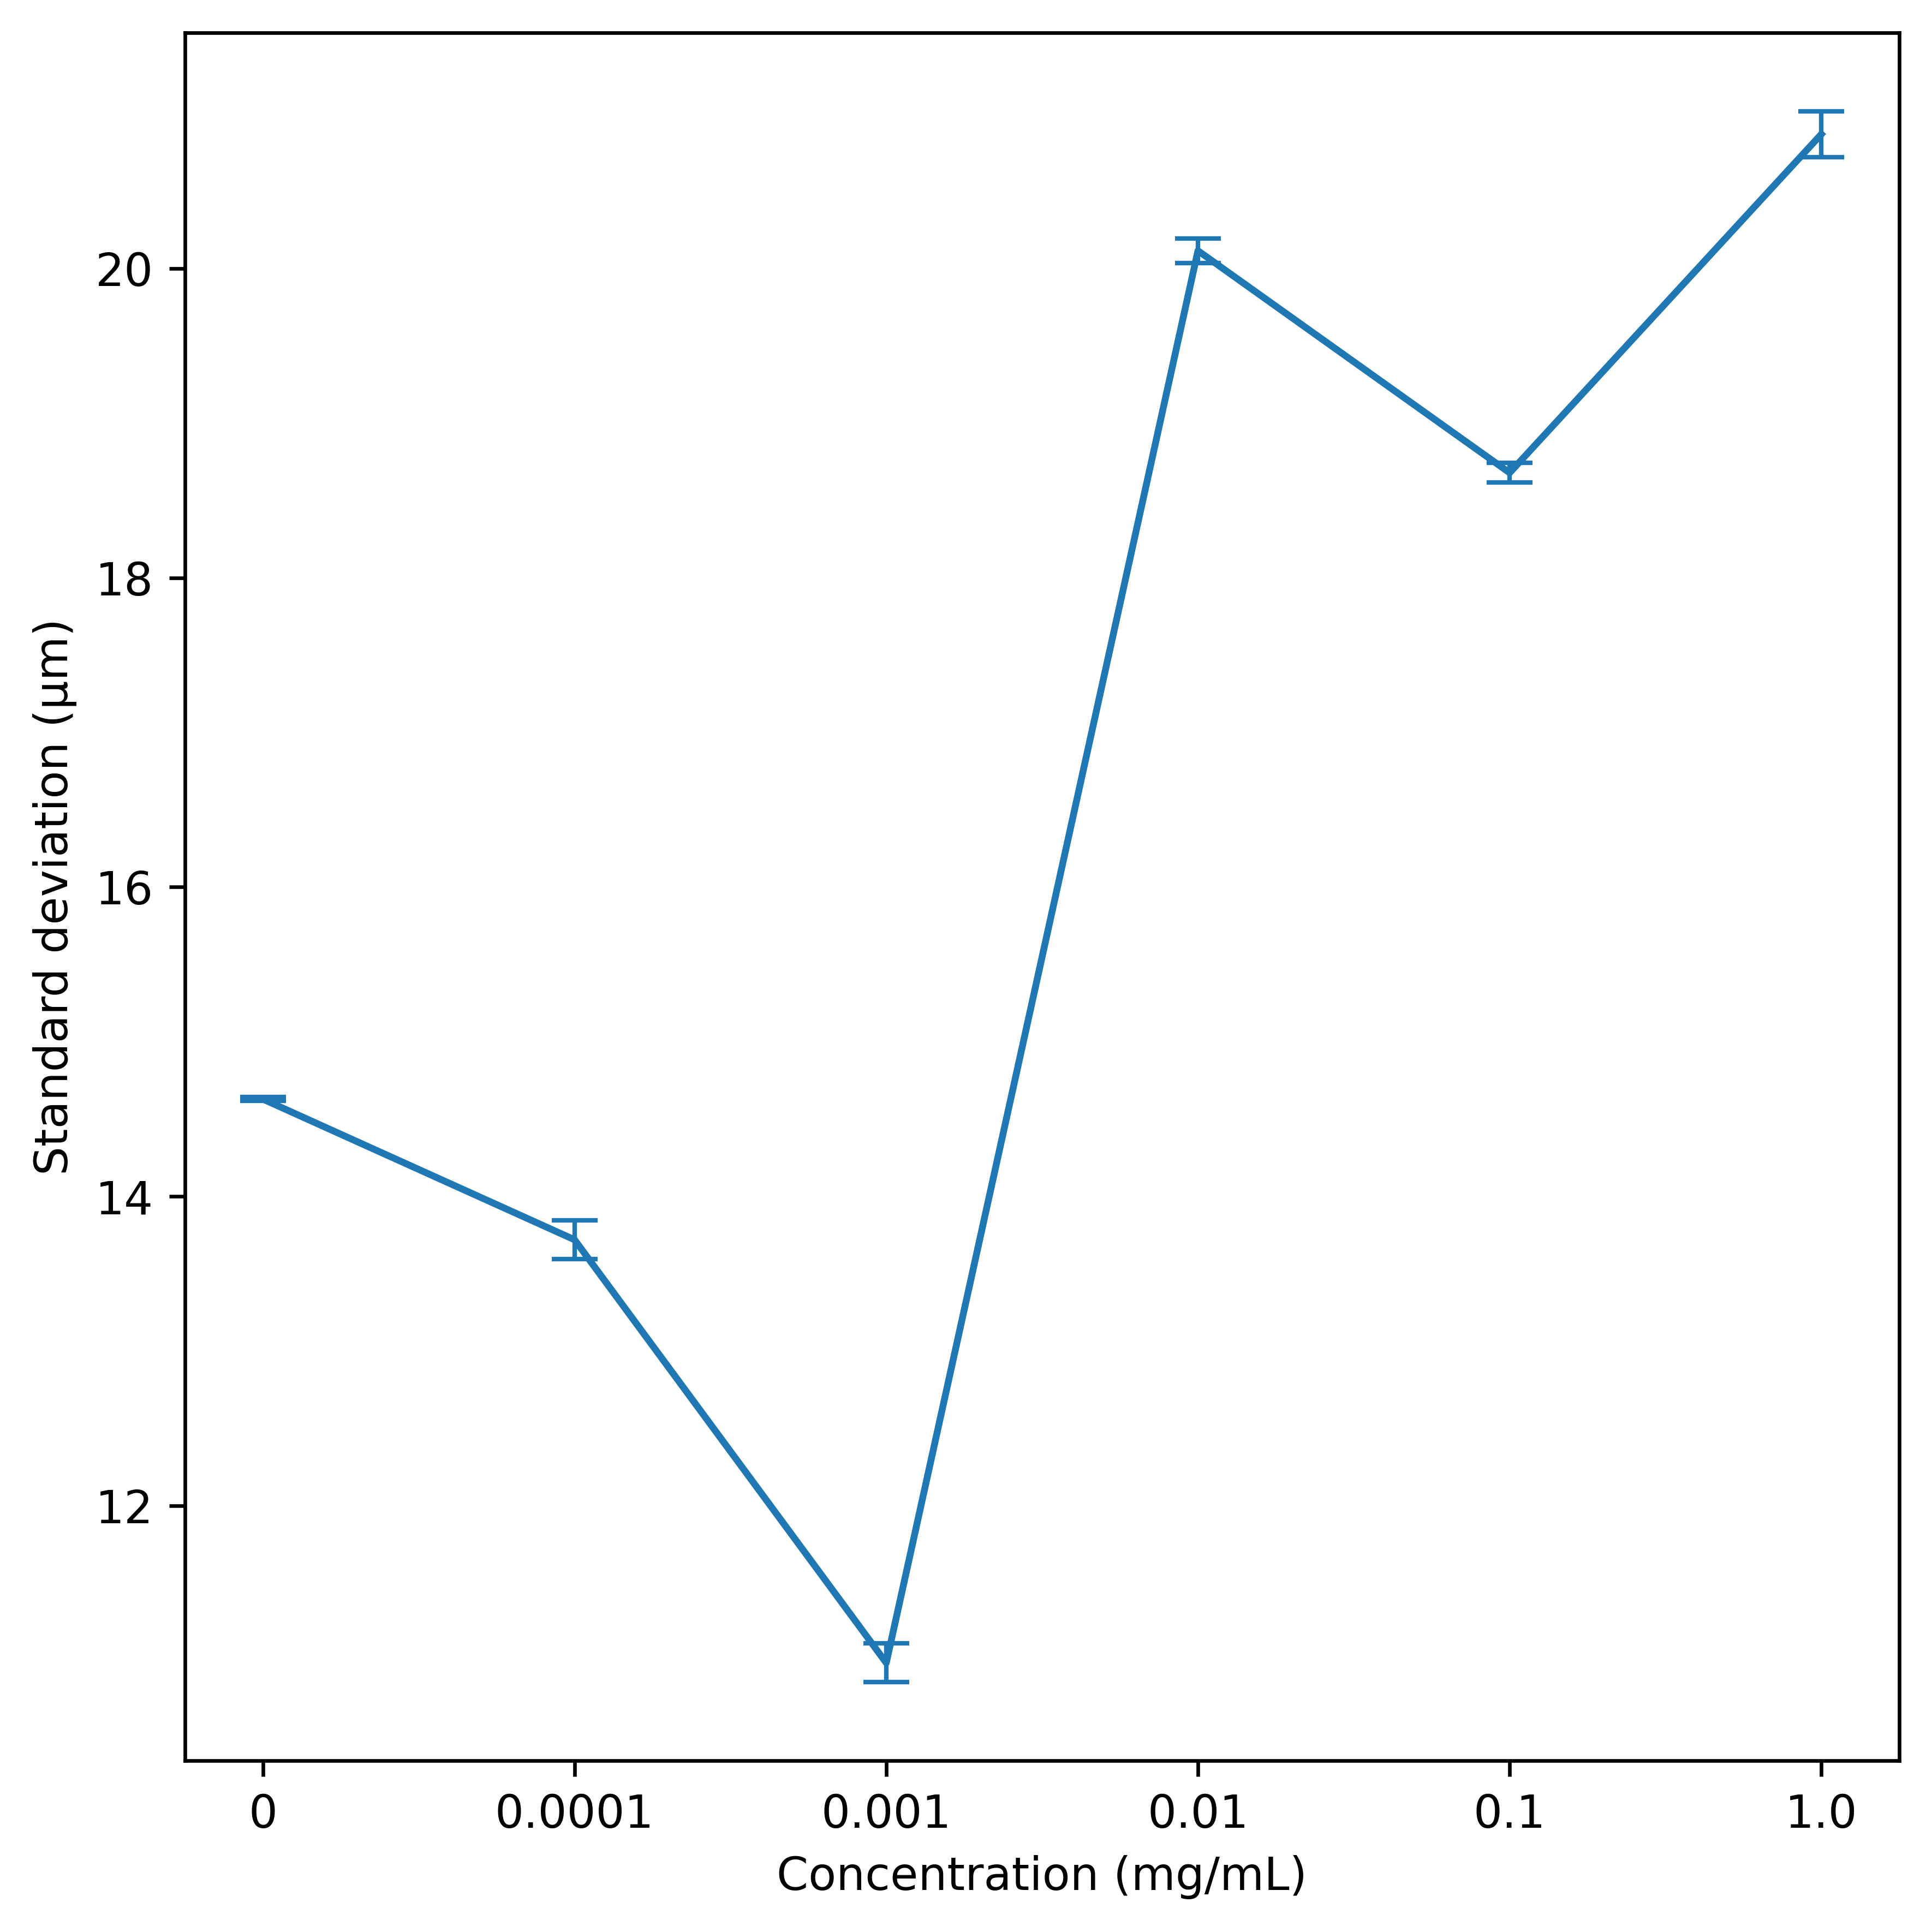

In [11]:
#plot bucketed concentration endpoints
matplotlib.rcParams['pdf.fonttype']=42
fig = plt.figure(figsize=(6,6),dpi=600)

output_metrics = []
output_errors = []

for sample in samples:
    with open(base_dir + samples[sample] + '.json', 'r') as f:
        beads = json.load(f)

    means = [[] for _ in range(d_count)]
    bead_count = 0
    static_threshold = 0.0

    for compartment in beads:
        for bead in beads[compartment]:
            bead_means = []
            distances = beads[compartment][bead]['distance_from_start']
            if len(distances) > 50:
                for i in range(d_count):
                    if len(distances) < (i+1)*d_frames:
                        mean = bead_means[-1]
                    else:
                        mean = np.mean(distances[i*d_frames:i*d_frames+d_frames])

                    bead_means.append(mean)
                    means[i].append(mean)

                bead_count += 1

    bead_means = []
    bead_errors = []

    for k in range(5):
        full_means = []
        full_errors = []

        for i in range(d_count):
            collected = means[i:i+1][0][k*100:(k+1)*100]
            full_means.append(np.mean(collected))
            full_errors.append(np.std(collected))

        bead_means.append(full_means[-1])
        bead_errors.append(full_errors[-1])

    output_metric = np.mean(bead_errors)
    output_error = np.std(bead_errors)/np.sqrt(5)/np.sqrt(100)

    output_metrics.append(output_metric)
    output_errors.append(output_error)

concs = ['0','0.0001','0.001','0.01','0.1','1.0']

plt.errorbar(concs, output_metrics[:], yerr=output_errors[:], capsize=5, elinewidth=1)

plt.xlabel('Concentration (mg/mL)')
# plt.ylabel('Distance (μm)')
plt.ylabel('Standard deviation (μm)')
plt.tight_layout()
fig.savefig(base_dir + 'sd_concs_bucketed.jpg', format='jpg')

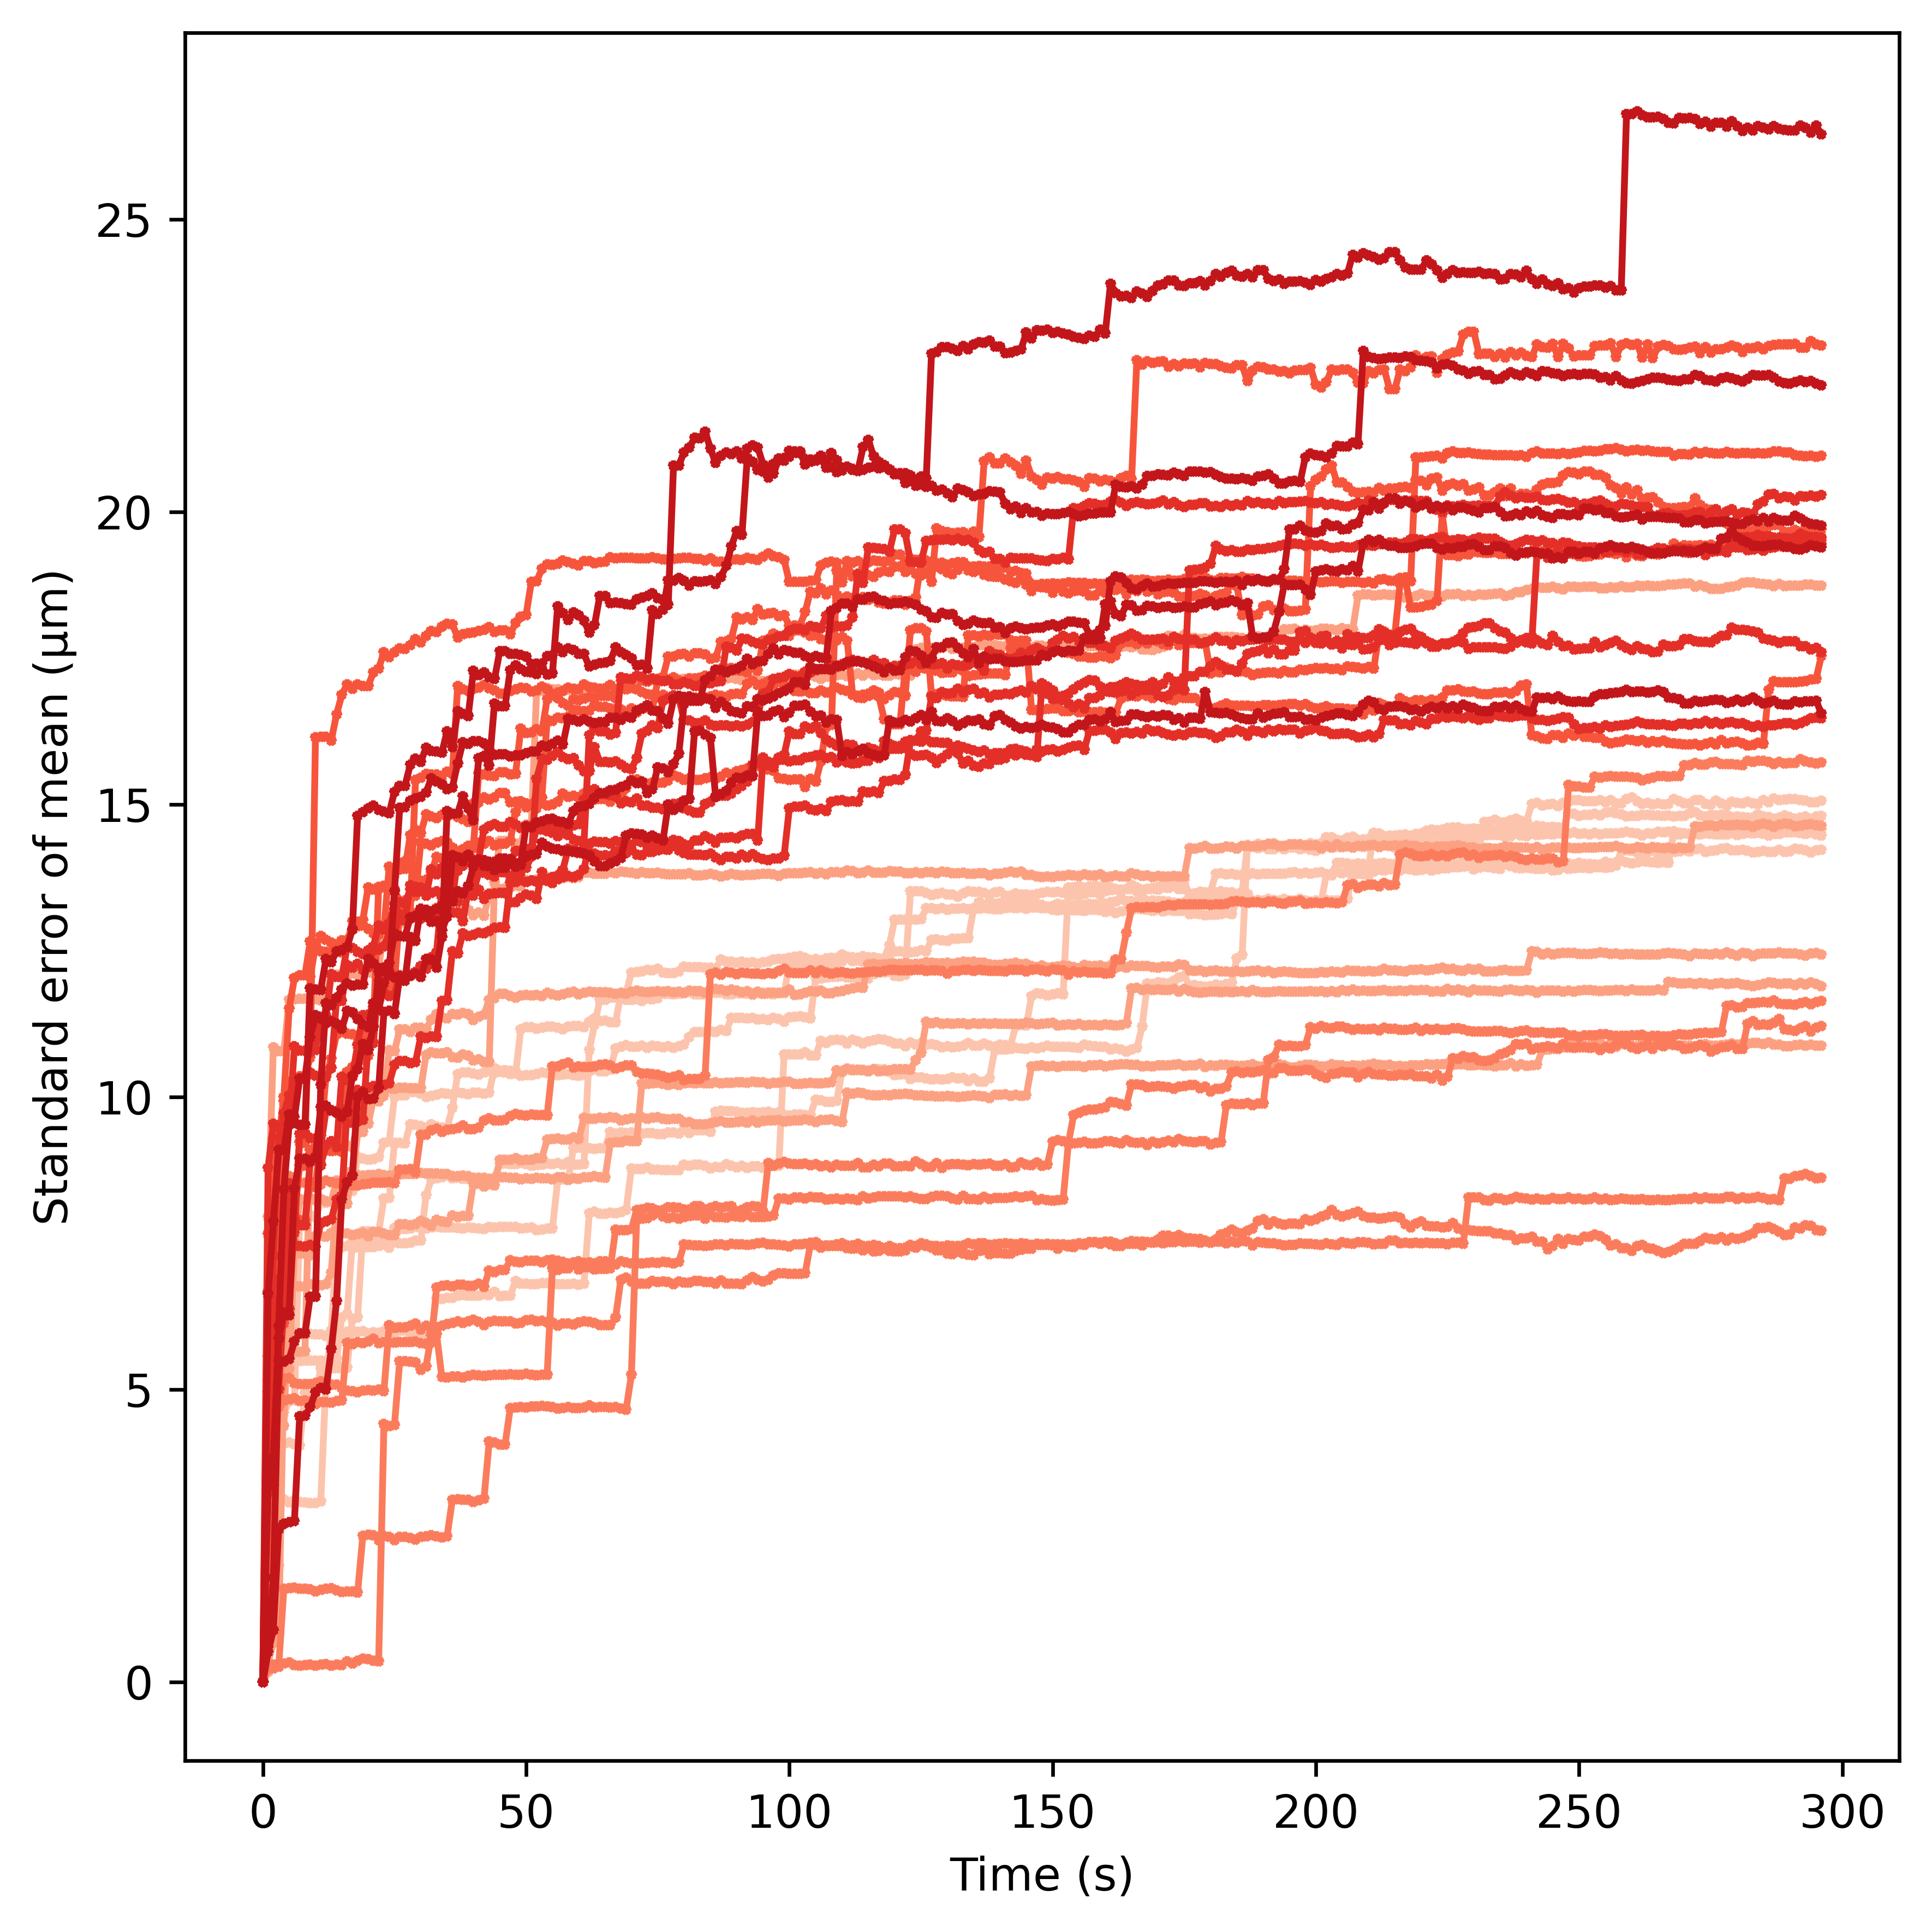

In [10]:
#plot distance buckets
matplotlib.rcParams['pdf.fonttype']=42
fig = plt.figure(figsize=(6,6),dpi=600)

times = np.arange(0,d_count,t_interval)
c_count = 0

for sample in samples:
    with open(base_dir + samples[sample] + '.json', 'r') as f:
        beads = json.load(f)

    means = [[] for _ in range(d_count)]
    bead_count = 0
    static_threshold = 0.0

    for compartment in beads:
        for bead in beads[compartment]:
            bead_means = []
            distances = beads[compartment][bead]['distance_from_start']
            if len(distances) > 50:
                for i in range(d_count):
                    if len(distances) < (i+1)*d_frames:
                        mean = bead_means[-1]
                    else:
                        mean = np.mean(distances[i*d_frames:i*d_frames+d_frames])

                    bead_means.append(mean)
                    means[i].append(mean)

                bead_count += 1

    bead_means = []
    bead_errors = []

    for k in range(5):
        full_means = []
        full_errors = []
        full_sds = []

        for i in range(d_count):
            collected = means[i:i+1][0][k*100:(k+1)*100]
            full_means.append(np.mean(collected))
            full_errors.append(np.std(collected)/np.sqrt(len(collected)))
            full_sds.append(np.std(collected))

        # plt.errorbar(times, full_means, color=plt.cm.Reds((c_count+2)/9), label=sample, yerr=full_errors, capsize=5, elinewidth=1)
        # plt.plot(times, full_means, color=plt.cm.Reds((c_count+2)/9), label=sample, marker='*', markersize=2)
        plt.plot(times, full_sds, color=plt.cm.Reds((c_count+2)/9), label=sample, marker='*', markersize=2)

    c_count += 1

plt.xlabel('Time (s)')
# plt.ylabel('Distance (μm)')
plt.ylabel('Standard error of mean (μm)')
plt.tight_layout()
fig.savefig(base_dir + 'sd_buckets.jpg', format='jpg')